In [1]:
import pandas as pd
df = pd.read_csv('../data/gold/schengen-visa.csv')
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
df['visas_applied'] = df['visas_applied'].astype('int')
df['visas_issued'] = df['visas_issued'].astype('int')
df['visas_not_issued'] = df['visas_not_issued'].astype('int')
df['year'] = df['year'].astype('str')
df['date'] = pd.to_datetime(df['year'], format='%Y')

In [3]:
df.dtypes

schengen_state               object
origin_country               object
origin_consulate             object
visas_applied                 int64
visas_issued                  int64
visas_not_issued              int64
visa_refusal_rate           float64
year                         object
date                 datetime64[ns]
dtype: object

In [4]:
df.describe()

,visas_applied,visas_issued,visas_not_issued,visa_refusal_rate
count,"18,535.00","18,535.00","18,535.00","18,211.00"
mean,"6,862.77","6,198.10",556.67,0.12
std,"31,253.40","30,143.95","2,707.94",0.17
min,0.00,0.00,0.00,0.00
25%,48.00,37.00,1.00,0.01
50%,592.00,466.00,27.00,0.05
75%,"3,353.00","2,693.50",296.00,0.17
max,"1,204,670.00","1,195,130.00","127,615.00",1.00


In [5]:
df.head()

,schengen_state,origin_country,origin_consulate,visas_applied,visas_issued,visas_not_issued,visa_refusal_rate,year,date
0,Austria,ALBANIA,TIRANA,50,39,6,0.13,2022,2022-01-01
1,Austria,ALGERIA,ALGIERS,2047,1213,831,0.41,2022,2022-01-01
2,Austria,ARGENTINA,BUENOS AIRES,18,18,0,0.00,2022,2022-01-01
3,Austria,AUSTRALIA,CANBERRA,1776,1751,22,0.01,2022,2022-01-01
4,Austria,AZERBAIJAN,BAKU,1788,1751,33,0.02,2022,2022-01-01


<AxesSubplot:xlabel='year'>

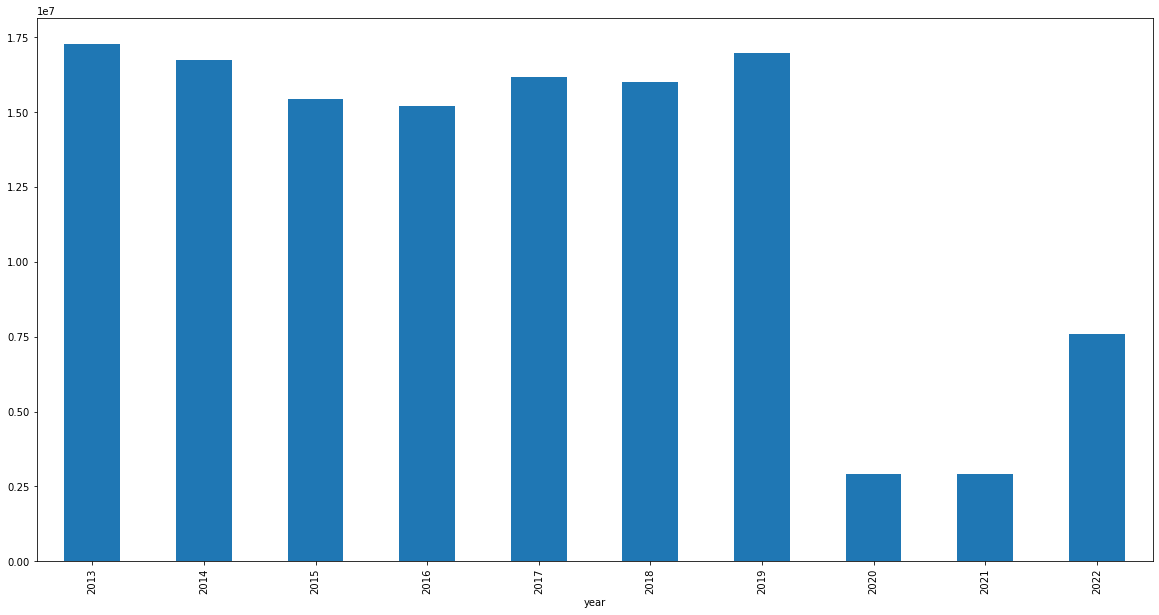

In [6]:
df.groupby(['year'])['visas_applied'].sum().plot.bar(figsize=(20,10))

<AxesSubplot:xlabel='year'>

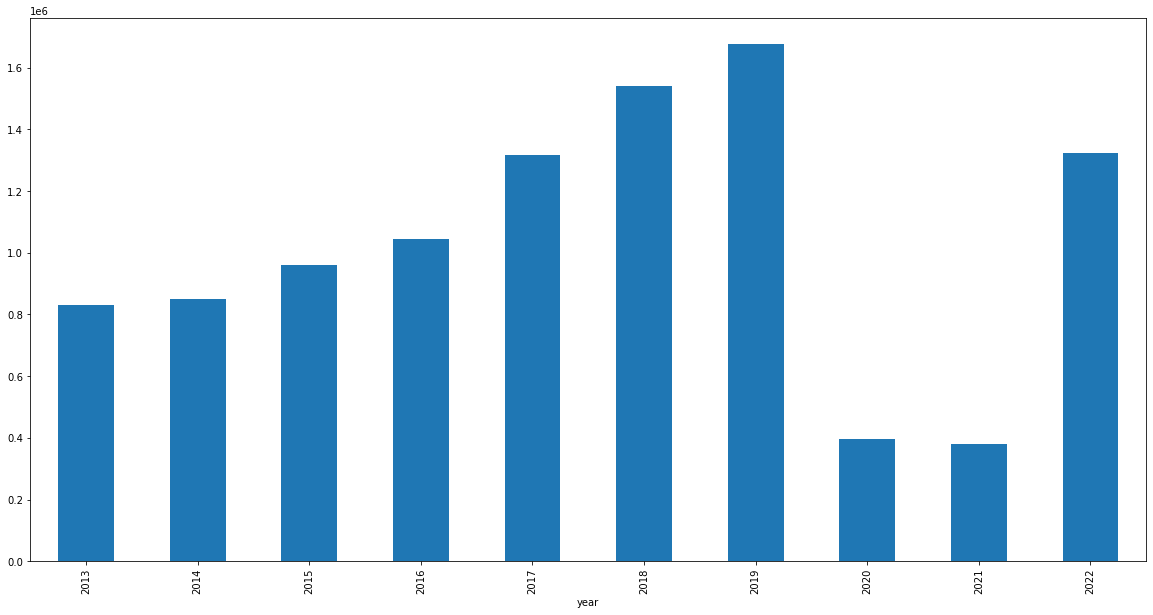

In [7]:
df.groupby(['year'])['visas_not_issued'].sum().plot.bar(figsize=(20,10))

<AxesSubplot:xlabel='year'>

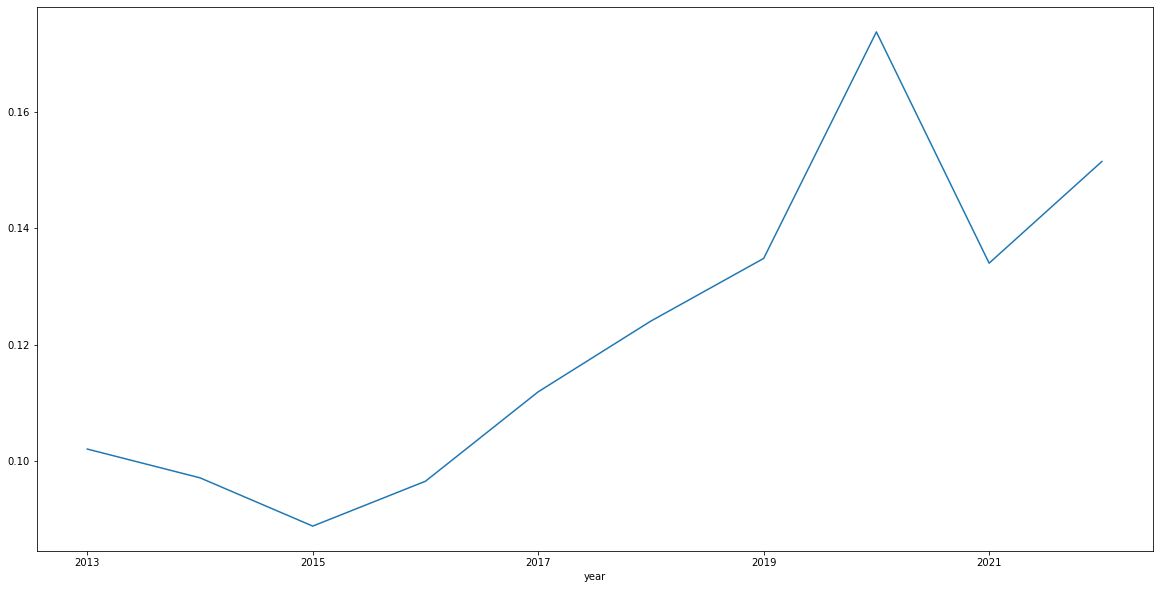

In [8]:
df.groupby(['year'])['visa_refusal_rate'].mean().plot.line(figsize=(20,10))

<AxesSubplot:title={'center':'visa_refusal_rate'}, xlabel='year'>

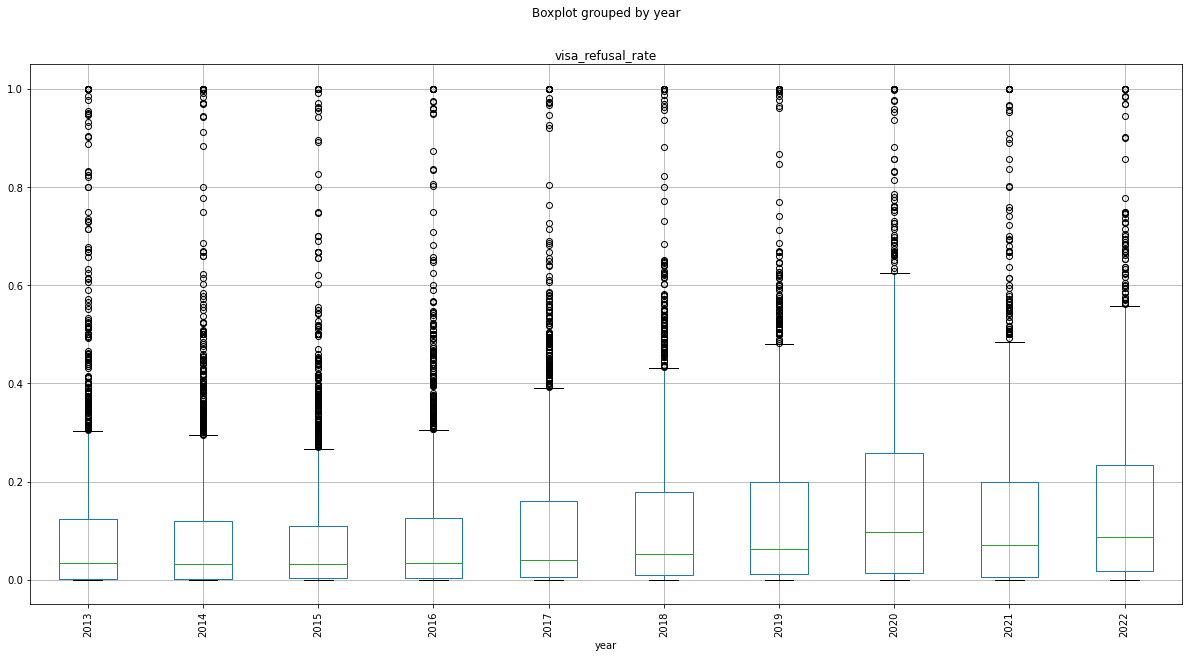

In [9]:
df.boxplot(column='visa_refusal_rate', by='year', rot=90, figsize=(20,10))

<AxesSubplot:xlabel='year', ylabel='visa_refusal_rate'>

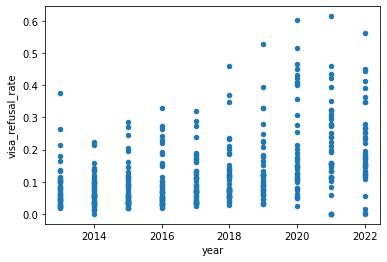

In [10]:
df.where(df["origin_country"] == 'INDIA').plot.scatter(x='year',y='visa_refusal_rate')

<AxesSubplot:xlabel='year'>

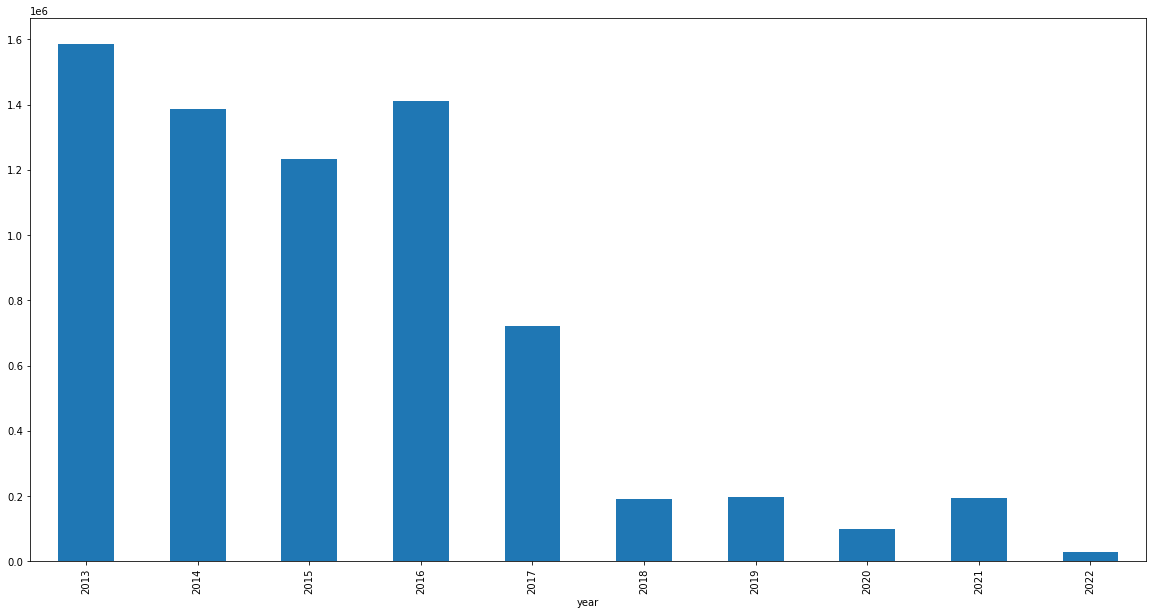

In [11]:
df.where(df["origin_country"] == 'UKRAINE').groupby(['year'])['visas_applied'].sum().plot.bar(figsize=(20,10))

In [11]:
df2 = df.pivot(index='date', columns=['schengen_state','origin_consulate'], values='visa_refusal_rate')

In [12]:
df2.unstack().head()

schengen_state  origin_consulate  date      
Austria         TIRANA            2014-01-01   0.03
                                  2015-01-01   0.05
                                  2016-01-01   0.00
                                  2017-01-01   0.08
                                  2018-01-01   0.22
dtype: float64

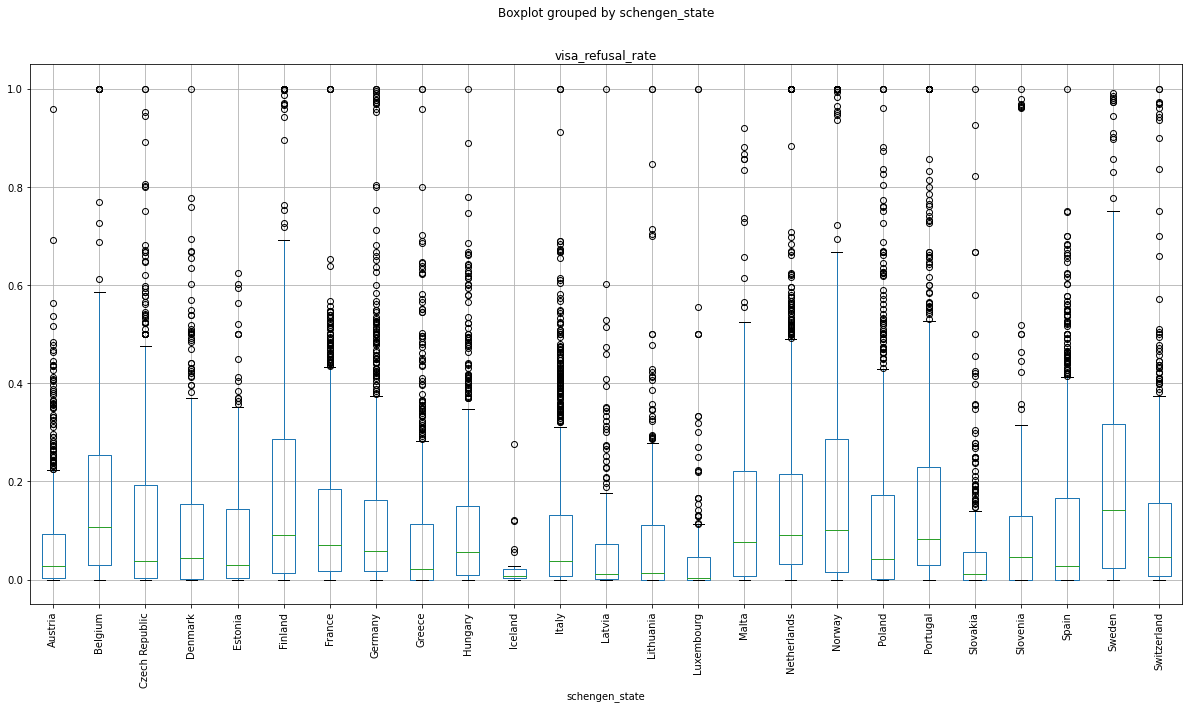

In [13]:
boxplot = df.boxplot(column='visa_refusal_rate', by='schengen_state', rot=90, figsize=(20,10))

<AxesSubplot:xlabel='year'>

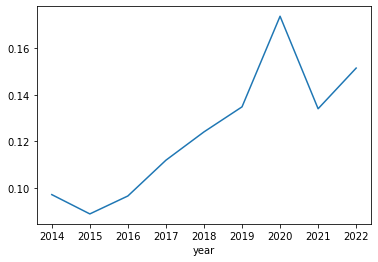

In [14]:
df.groupby(['year'])['visa_refusal_rate'].mean().plot.line()

In [15]:
df.where(df['year'] == 2020).groupby(['year','schengen_state'])['visa_refusal_rate'].mean()

Series([], Name: visa_refusal_rate, dtype: float64)

In [16]:
df.groupby(['origin_country'])['visa_refusal_rate'].mean()

origin_country
AFGHANISTAN   0.17
ALBANIA       0.11
ALGERIA       0.39
ANDORRA       0.00
ANGOLA        0.33
              ... 
VIET NAM      0.10
VIETNAM       0.10
YEMEN         0.13
ZAMBIA        0.14
ZIMBABWE      0.10
Name: visa_refusal_rate, Length: 192, dtype: float64